<a href="https://colab.research.google.com/github/murillodomingos/Speed-Dating/blob/main/SpeedDating_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2° Trabalho Fundamentos em Ciência de Dados**

*   **Prof**: Diego Furtado
*   **Participantes**: Murillo Domingos de Almeida, Bruno Neves Boa Sorte, Caio Uramoto Evangelista


---



---




*LOVE IS IN THE AIR...*


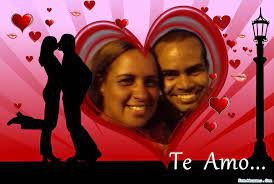


---



---



Analises iniciais e configurações


In [ ]:
# Configurações básicas do ambiente
!pip install openml
import openml
dataset_id = 40536
dataset = openml.datasets.get_dataset(40536)
X, y, _, _ = dataset.get_data(dataset_format = "dataframe", target = dataset.default_target_attribute)

/usr/local/lib/python3.10/dist-packages/openml/datasets/functions.py:437: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


In [ ]:
# Importa as ferramentas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import markers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Visão de como os dados estão dispopníveis
X.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,d_importance_same_race,d_importance_same_religion,field,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,d_attractive_o,d_sinsere_o,d_intelligence_o,d_funny_o,d_ambitous_o,d_shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,d_attractive_important,d_sincere_important,d_intellicence_important,d_funny_important,d_ambtition_important,d_shared_interests_important,attractive,sincere,intelligence,funny,ambition,d_attractive,d_sincere,d_intelligence,d_funny,d_ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,d_attractive_partner,d_sincere_partner,d_intelligence_partner,d_funny_partner,d_ambition_partner,d_shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,d_sports,d_tvsports,d_exercise,d_dining,d_museums,d_art,d_hiking,d_gaming,d_clubbing,d_reading,d_tv,d_theater,d_movies,d_concerts,d_music,d_shopping,d_yoga,interests_correlate,d_interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met
0,0,1,female,21.0,27.0,6,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,[2-5],[2-5],Law,35.0,20.0,20.0,20.0,0.0,5.0,[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],6.0,8.0,8.0,8.0,8.0,6.0,[6-8],[6-8],[6-8],[6-8],[6-8],[6-8],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],6.0,9.0,7.0,7.0,6.0,5.0,[6-8],[9-10],[6-8],[6-8],[6-8],[0-5],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.14,[0-0.33],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0
1,0,1,female,21.0,22.0,1,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,[2-5],[2-5],Law,60.0,0.0,0.0,40.0,0.0,0.0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7.0,8.0,10.0,7.0,7.0,5.0,[6-8],[6-8],[9-10],[6-8],[6-8],[0-5],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],7.0,8.0,7.0,8.0,5.0,6.0,[6-8],[6-8],[6-8],[6-8],[0-5],[6-8],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.54,[0.33-1],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0
2,1,1,female,21.0,22.0,1,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2.0,4.0,[2-5],[2-5],Law,19.0,18.0,19.0,18.0,14.0,12.0,[16-20],[16-20],[16-20],[16-20],[0-15],[0-15],10.0,10.0,10.0,10.0,10.0,10.0,[9-10],[9-10],[9-10],[9-10],[9-10],[9-10],15.0,20.0,20.0,15.0,15.0,15.0,[0-15],[16-20],[16-20],[0-15],[0-15],[0-15],6.0,8.0,8.0,8.0,7.0,[6-8],[6-8],[6-8],[6-8],[6-8],5.0,8.0,9.0,8.0,5.0,7.0,[0-5],[6-8],[9-10],[6-8],[0-5],[6-8],9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,[9-10],[0-5],[6-8],[9-10],[0-5],[0-5],[0-5],[0-5],[0-5],[6-8],[9-10],[0-5],[9-10],[9-10],[9-10],[6-8],[0-5],0.16,[0-0.33],3.0,2.0,4.0,[0-4],[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0
3,0,1,female,21.0,23.0,2,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2.0,4.0,[2-5],[2-5],Law,30.0,5.0,15.0,40.0,5.0,5.0,[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],7.0,8.0,9.0,8.0

In [ ]:
# Verifica os tipos
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 120 entries, has_null to met
dtypes: category(61), float64(57), uint8(2)
memory usage: 4.2 MB


In [ ]:
# Visão estatística dos dados
X.describe()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met
count,8378.000000,8283.000000,8274.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,1800.000000,7205.000000,8138.000000,8069.000000,8003.000000
mean,11.350919,26.358928,26.364999,4.185605,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,7.084733,8.294935,7.704460,8.403965,7.578388,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,0.196010,5.534131,5.570556,3.207814,6.134087,5.207523,0.049856
std,5.995903,3.566763,3.563648,4.596171,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,12.587674,7.046700,6.783003,6.085239,6.124888,6.362154,1.395783,1.407460,1.564321,1.076608,1.778315,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.620507,2.502218,2.006565,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,0.303539,1.734059,4.762569,2.444813,1.841285,2.129565,0.282168
min,1.000000,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,24.000000,1.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,6.000000,8.000000,7.000000,8.000000,7.000000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,4.000000,2.000000,5.000000,7.000000,6.000000,5.000000,4.000000,2.000000,4.000000,7.000000,3.000000,5.000000,7.000000,5.000000,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000
50%,11.000000,26.000000,26.000000,3.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.640000,7.000000,8.000000,8.000000,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000

In [ ]:
# Quantia de dados faltantes
X.isnull().sum()

has_null                              0
wave                                  0
gender                                0
age                                  95
age_o                               104
d_age                                 0
d_d_age                               0
race                                 63
race_o                               73
samerace                              0
importance_same_race                 79
importance_same_religion             79
d_importance_same_race                0
d_importance_same_religion            0
field                                63
pref_o_attractive                    89
pref_o_sincere                       89
pref_o_intelligence                  89
pref_o_funny                         98
pref_o_ambitious                    107
pref_o_shared_interests             129
d_pref_o_attractive                   0
d_pref_o_sincere                      0
d_pref_o_intelligence                 0
d_pref_o_funny                        0


Pré-processamento

In [ ]:
# Verifica desbalanceamento de classes
y.value_counts()

0    6998
1    1380
Name: match, dtype: int64

In [ ]:
# Transforma gênero em númerico
df_temp = pd.get_dummies(X['gender'], dtype=float)
# Insere as colunas geradas no dataset
X = pd.concat([X, df_temp], axis=1)

In [ ]:
# Transforma gênero em númerico
df_temp = pd.get_dummies(X['samerace'], dtype=float)
# Renomeia coluna gerada
X = X.rename(columns={'samerace': 'samerace_antigo'})
df_temp = df_temp.rename(columns={'1': 'samerace'})
# Insere as colunas geradas no dataset
X = pd.concat([X, df_temp], axis=1)

In [ ]:
# Mostra as colunas do dataset
X.columns.to_list()

['has_null',
 'wave',
 'gender',
 'age',
 'age_o',
 'd_age',
 'd_d_age',
 'race',
 'race_o',
 'samerace_antigo',
 'importance_same_race',
 'importance_same_religion',
 'd_importance_same_race',
 'd_importance_same_religion',
 'field',
 'pref_o_attractive',
 'pref_o_sincere',
 'pref_o_intelligence',
 'pref_o_funny',
 'pref_o_ambitious',
 'pref_o_shared_interests',
 'd_pref_o_attractive',
 'd_pref_o_sincere',
 'd_pref_o_intelligence',
 'd_pref_o_funny',
 'd_pref_o_ambitious',
 'd_pref_o_shared_interests',
 'attractive_o',
 'sinsere_o',
 'intelligence_o',
 'funny_o',
 'ambitous_o',
 'shared_interests_o',
 'd_attractive_o',
 'd_sinsere_o',
 'd_intelligence_o',
 'd_funny_o',
 'd_ambitous_o',
 'd_shared_interests_o',
 'attractive_important',
 'sincere_important',
 'intellicence_important',
 'funny_important',
 'ambtition_important',
 'shared_interests_important',
 'd_attractive_important',
 'd_sincere_important',
 'd_intellicence_important',
 'd_funny_important',
 'd_ambtition_important',
 '

In [ ]:
# Seleciona as colunas utilizadas
df = X[[
#  'has_null',
#  'wave',
#  'gender',
#  'age',
 'age_o',
 'd_age',
#  'd_d_age',
#  'race',
#  'race_o',
 'samerace',
 'importance_same_race',
#  'importance_same_religion',
#  'd_importance_same_race',
#  'd_importance_same_religion',
#  'field',
 'pref_o_attractive',
 'pref_o_sincere',
 'pref_o_intelligence',
 'pref_o_funny',
 'pref_o_ambitious',
 'pref_o_shared_interests',
#  'd_pref_o_attractive',
#  'd_pref_o_sincere',
#  'd_pref_o_intelligence',
#  'd_pref_o_funny',
#  'd_pref_o_ambitious',
#  'd_pref_o_shared_interests',
 'attractive_o',
 'sinsere_o',
 'intelligence_o',
 'funny_o',
 'ambitous_o',
 'shared_interests_o',
#  'd_attractive_o',
#  'd_sinsere_o',
#  'd_intelligence_o',
#  'd_funny_o',
#  'd_ambitous_o',
#  'd_shared_interests_o',
 'attractive_important',
 'sincere_important',
 'intellicence_important',
 'funny_important',
 'ambtition_important',
 'shared_interests_important',
#  'd_attractive_important',
#  'd_sincere_important',
#  'd_intellicence_important',
#  'd_funny_important',
#  'd_ambtition_important',
#  'd_shared_interests_important',
 'attractive',
 'sincere',
 'intelligence',
 'funny',
 'ambition',
#  'd_attractive',
#  'd_sincere',
#  'd_intelligence',
#  'd_funny',
#  'd_ambition',
 'attractive_partner',
 'sincere_partner',
 'intelligence_partner',
 'funny_partner',
 'ambition_partner',
 'shared_interests_partner',
#  'd_attractive_partner',
#  'd_sincere_partner',
#  'd_intelligence_partner',
#  'd_funny_partner',
#  'd_ambition_partner',
#  'd_shared_interests_partner',
#  'sports',
#  'tvsports',
#  'exercise',
#  'dining',
#  'museums',
#  'art',
#  'hiking',
#  'gaming',
#  'clubbing',
#  'reading',
#  'tv',
#  'theater',
#  'movies',
#  'concerts',
#  'music',
#  'shopping',
#  'yoga',
#  'd_sports',
#  'd_tvsports',
#  'd_exercise',
#  'd_dining',
#  'd_museums',
#  'd_art',
#  'd_hiking',
#  'd_gaming',
#  'd_clubbing',
#  'd_reading',
#  'd_tv',
#  'd_theater',
#  'd_movies',
#  'd_concerts',
#  'd_music',
#  'd_shopping',
#  'd_yoga',
 'interests_correlate',
#  'd_interests_correlate',
 'expected_happy_with_sd_people',
 'expected_num_interested_in_me',
 'expected_num_matches',
#  'd_expected_happy_with_sd_people',
#  'd_expected_num_interested_in_me',
#  'd_expected_num_matches',
 'like',
 'guess_prob_liked',
#  'd_like',
#  'd_guess_prob_liked',
 'met',
 'male']]

In [ ]:
# Cria lista dos dados numericos e categoricos
numeric_data = []
categoric_data = []

age_o : float64
d_age : uint8
samerace : float64
importance_same_race : float64
pref_o_attractive : float64
pref_o_sincere : float64
pref_o_intelligence : float64
pref_o_funny : float64
pref_o_ambitious : float64
pref_o_shared_interests : float64
attractive_o : float64
sinsere_o : float64
intelligence_o : float64
funny_o : float64
ambitous_o : float64
shared_interests_o : float64
attractive_important : float64
sincere_important : float64
intellicence_important : float64
funny_important : float64
ambtition_important : float64
shared_interests_important : float64
attractive : float64
sincere : float64


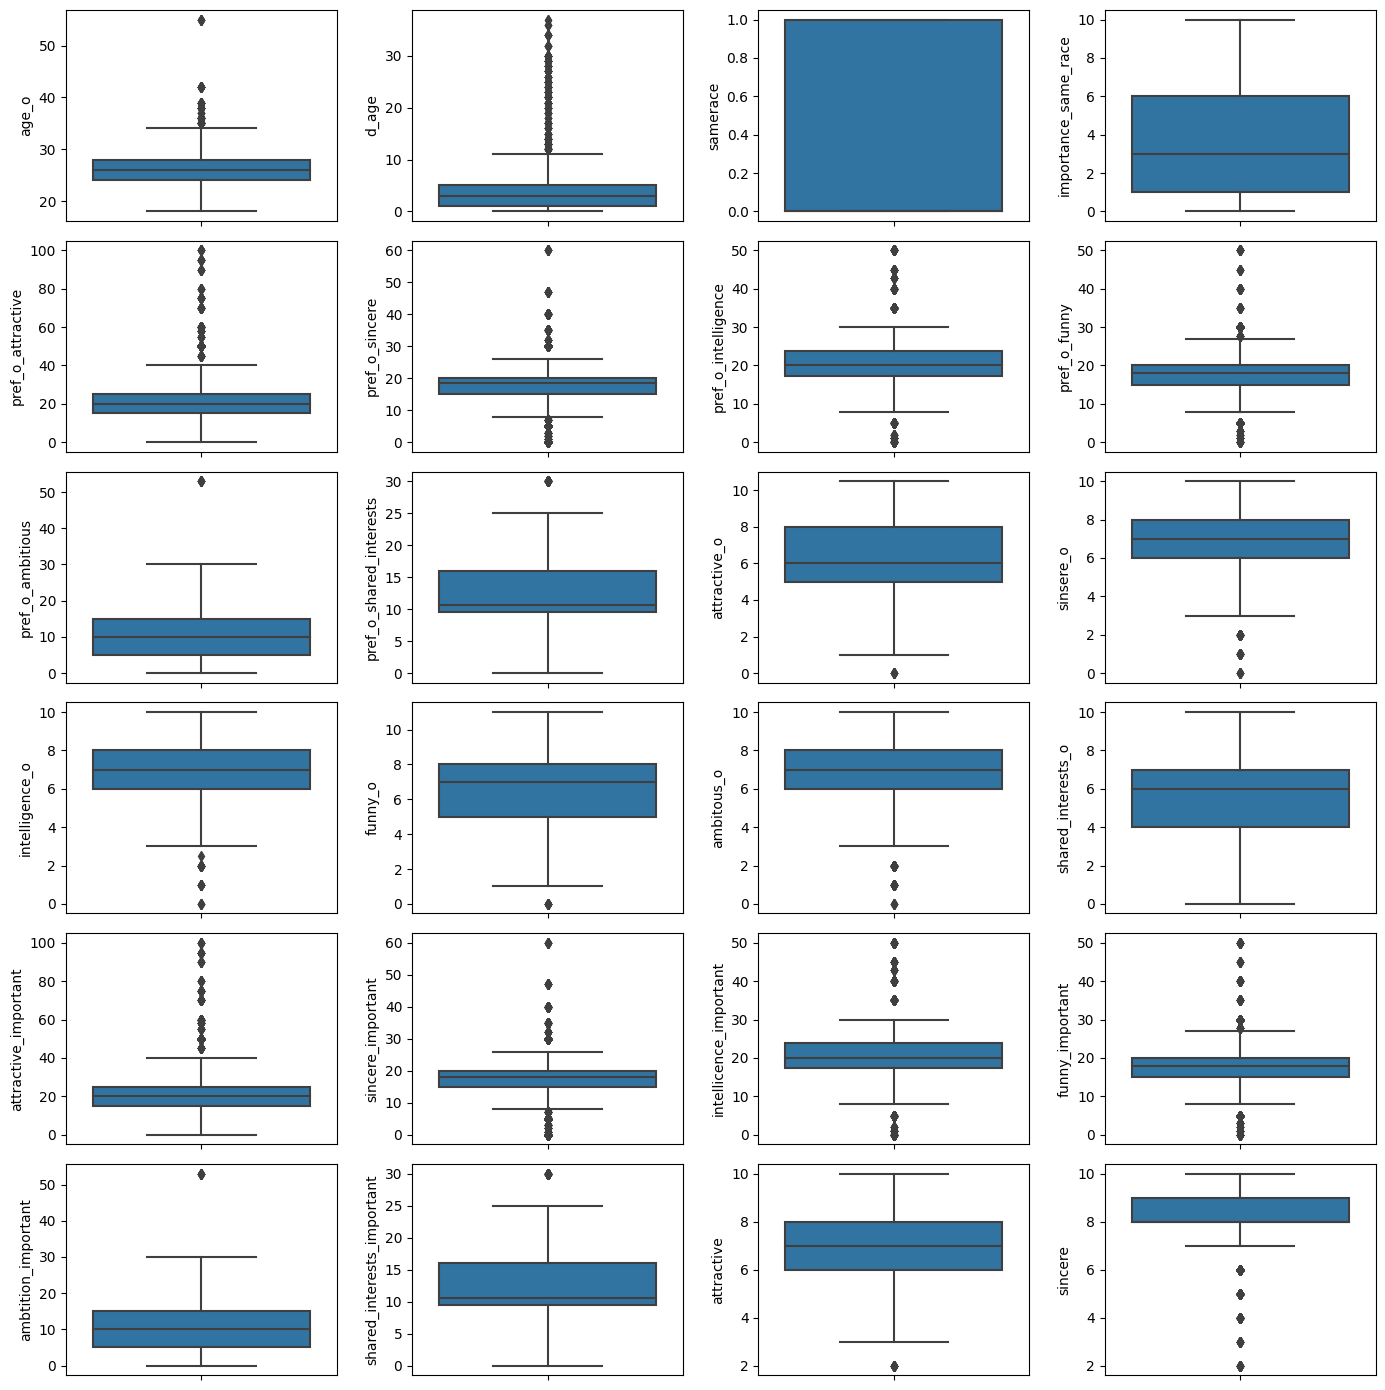

In [ ]:
# Identificação de Outliers

# Carrega variaveis para plot
temp = []
for i in df.columns[0:24].tolist():
        if df.dtypes[i] == 'uint8' or df.dtypes[i] == 'float64':
          print(i, ':' , df.dtypes[i])
          temp.append(i)
          numeric_data.append(i)
        else:
          categoric_data.append(i)




plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(6, 4)

linha = 0
coluna = 0

for i in temp:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0

plt.show()

intelligence : float64
funny : float64
ambition : float64
attractive_partner : float64
sincere_partner : float64
intelligence_partner : float64
funny_partner : float64
ambition_partner : float64
shared_interests_partner : float64
interests_correlate : float64
expected_happy_with_sd_people : float64
expected_num_interested_in_me : float64
expected_num_matches : float64
like : float64
guess_prob_liked : float64
met : float64
male : float64


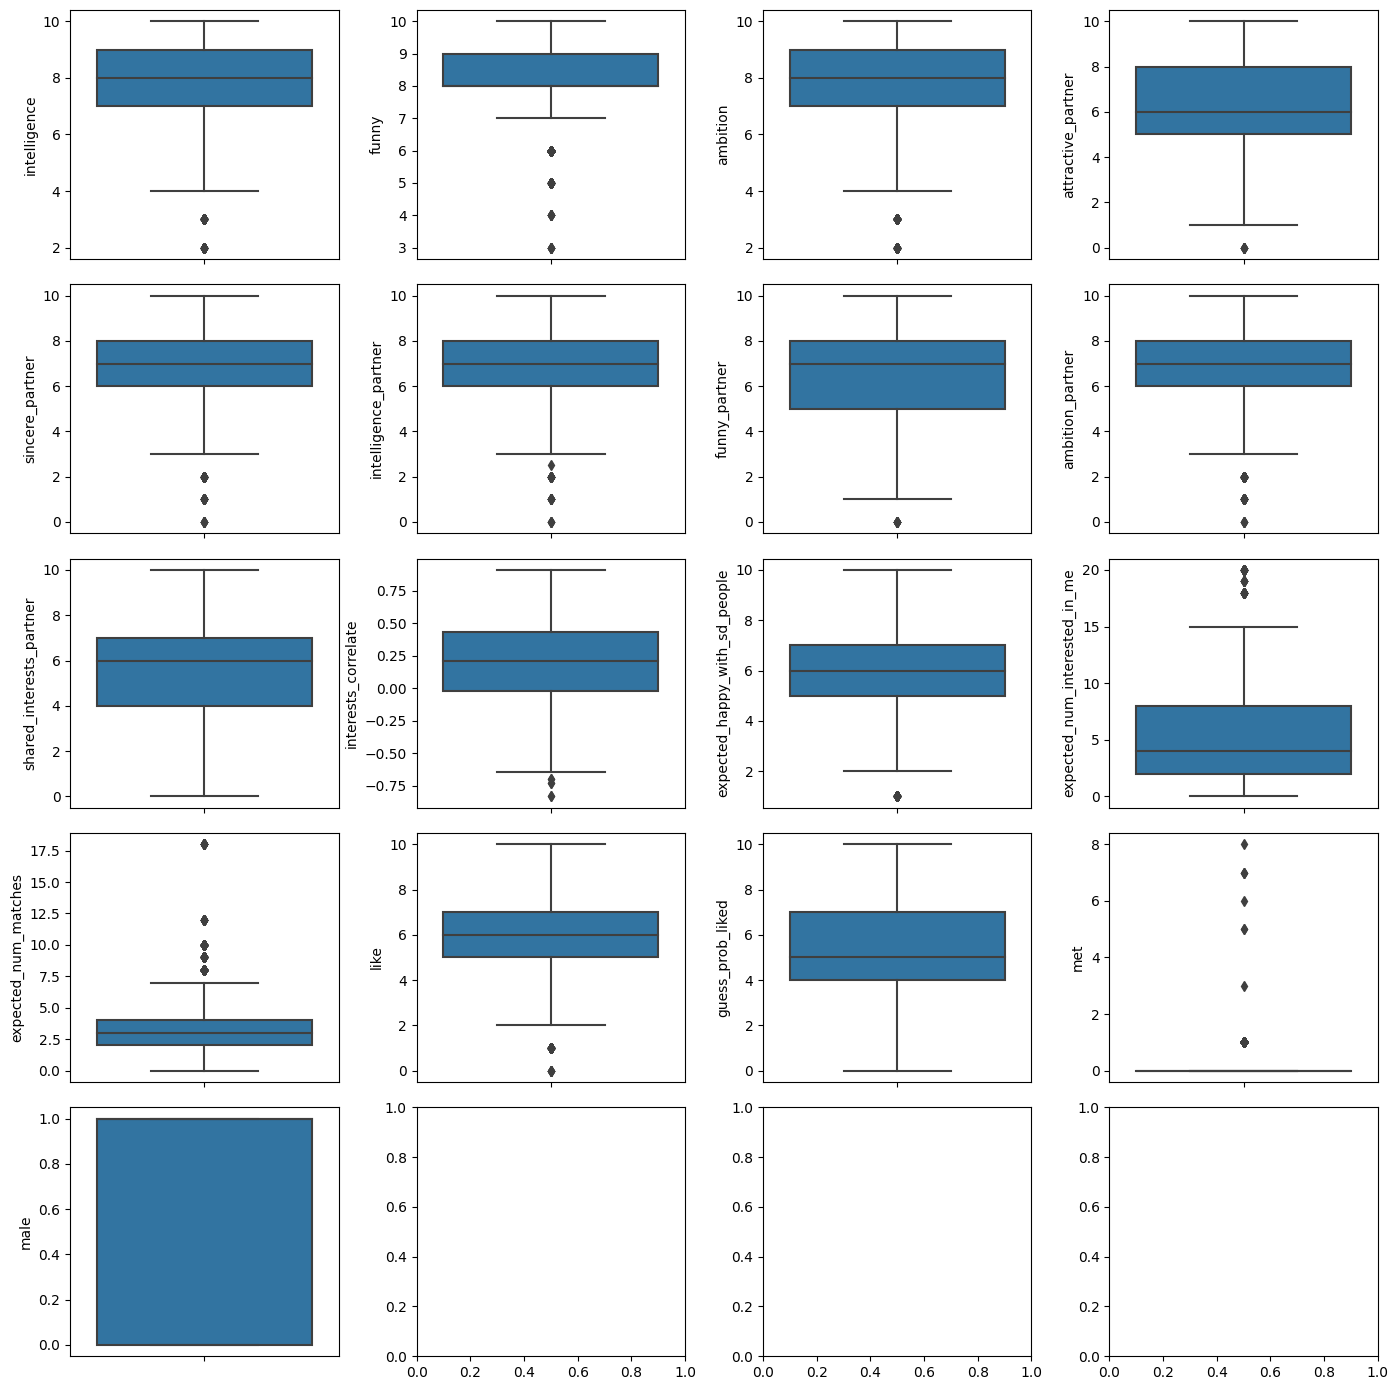

In [ ]:
temp = []
for i in df.columns[24:46].tolist():
        if df.dtypes[i] == 'uint8' or df.dtypes[i] == 'float64':
          print(i, ':' , df.dtypes[i])
          temp.append(i)
          numeric_data.append(i)
        else:
          categoric_data.append(i)



plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(5, 4)

linha = 0
coluna = 0
for i in temp:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0

plt.show()

In [ ]:
# Filtra a coluna met, possiveis dados errados
df.loc[df['met'] > 1, 'met'] = np.nan # dados 'errados' colocados como nan
df['met'].value_counts()

0.0    7644
1.0     351
Name: met, dtype: int64

In [ ]:
std_threshold = 3  # Limiar de desvio padrão para identificar outliers

# Filtra os outliers
for i in numeric_data:
  if i != 'met':
    mean = df[i].mean()
    std = df[i].std()

    df.loc[np.abs(df[i] - mean) > std_threshold * std, i] = np.nan

age_o : float64
d_age : float64
samerace : float64
importance_same_race : float64
pref_o_attractive : float64
pref_o_sincere : float64
pref_o_intelligence : float64
pref_o_funny : float64
pref_o_ambitious : float64
pref_o_shared_interests : float64
attractive_o : float64
sinsere_o : float64
intelligence_o : float64
funny_o : float64
ambitous_o : float64
shared_interests_o : float64
attractive_important : float64
sincere_important : float64
intellicence_important : float64
funny_important : float64
ambtition_important : float64
shared_interests_important : float64
attractive : float64
sincere : float64


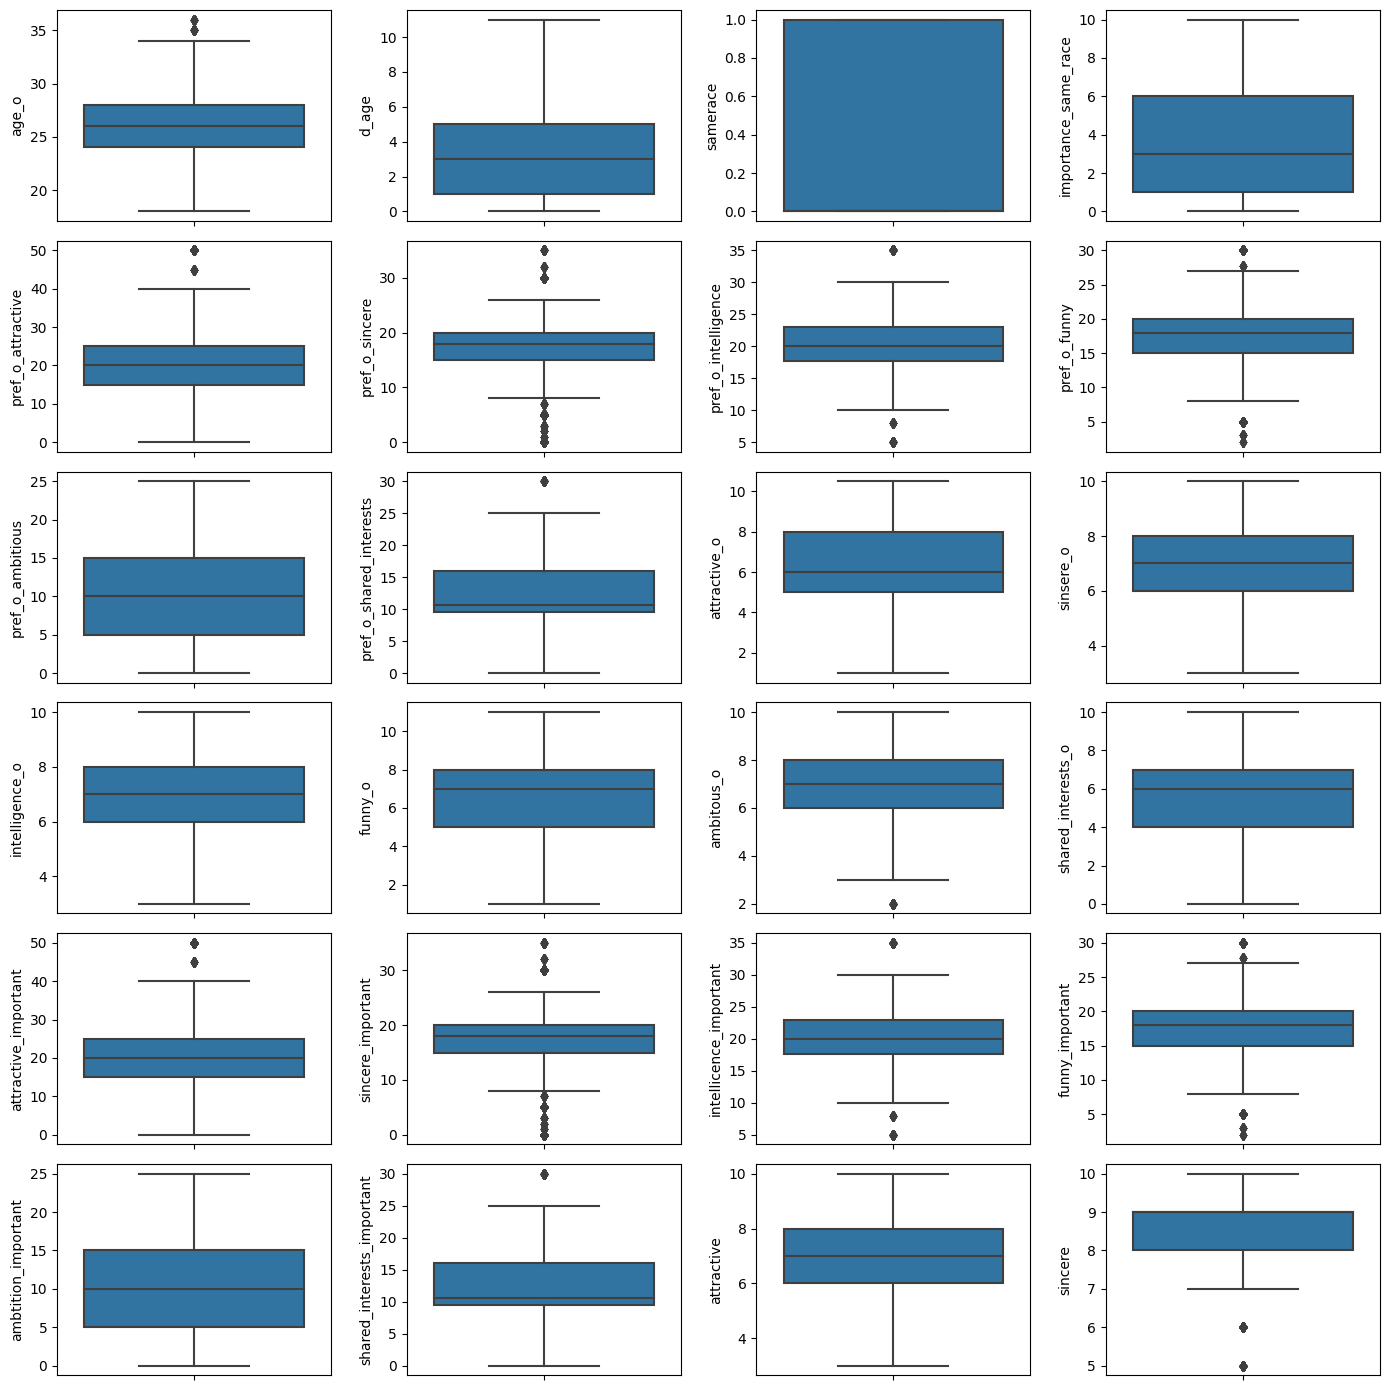

In [ ]:
# Verificação do resultado

#carregar variaveis para plot
temp = []
for i in df.columns[0:24].tolist():
        if df.dtypes[i] == 'uint8' or df.dtypes[i] == 'float64':
            print(i, ':' , df.dtypes[i])
            temp.append(i)



plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(6, 4)

linha = 0
coluna = 0

for i in temp:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0

plt.show()

intelligence : float64
funny : float64
ambition : float64
attractive_partner : float64
sincere_partner : float64
intelligence_partner : float64
funny_partner : float64
ambition_partner : float64
shared_interests_partner : float64
interests_correlate : float64
expected_happy_with_sd_people : float64
expected_num_interested_in_me : float64
expected_num_matches : float64
like : float64
guess_prob_liked : float64
met : float64
male : float64


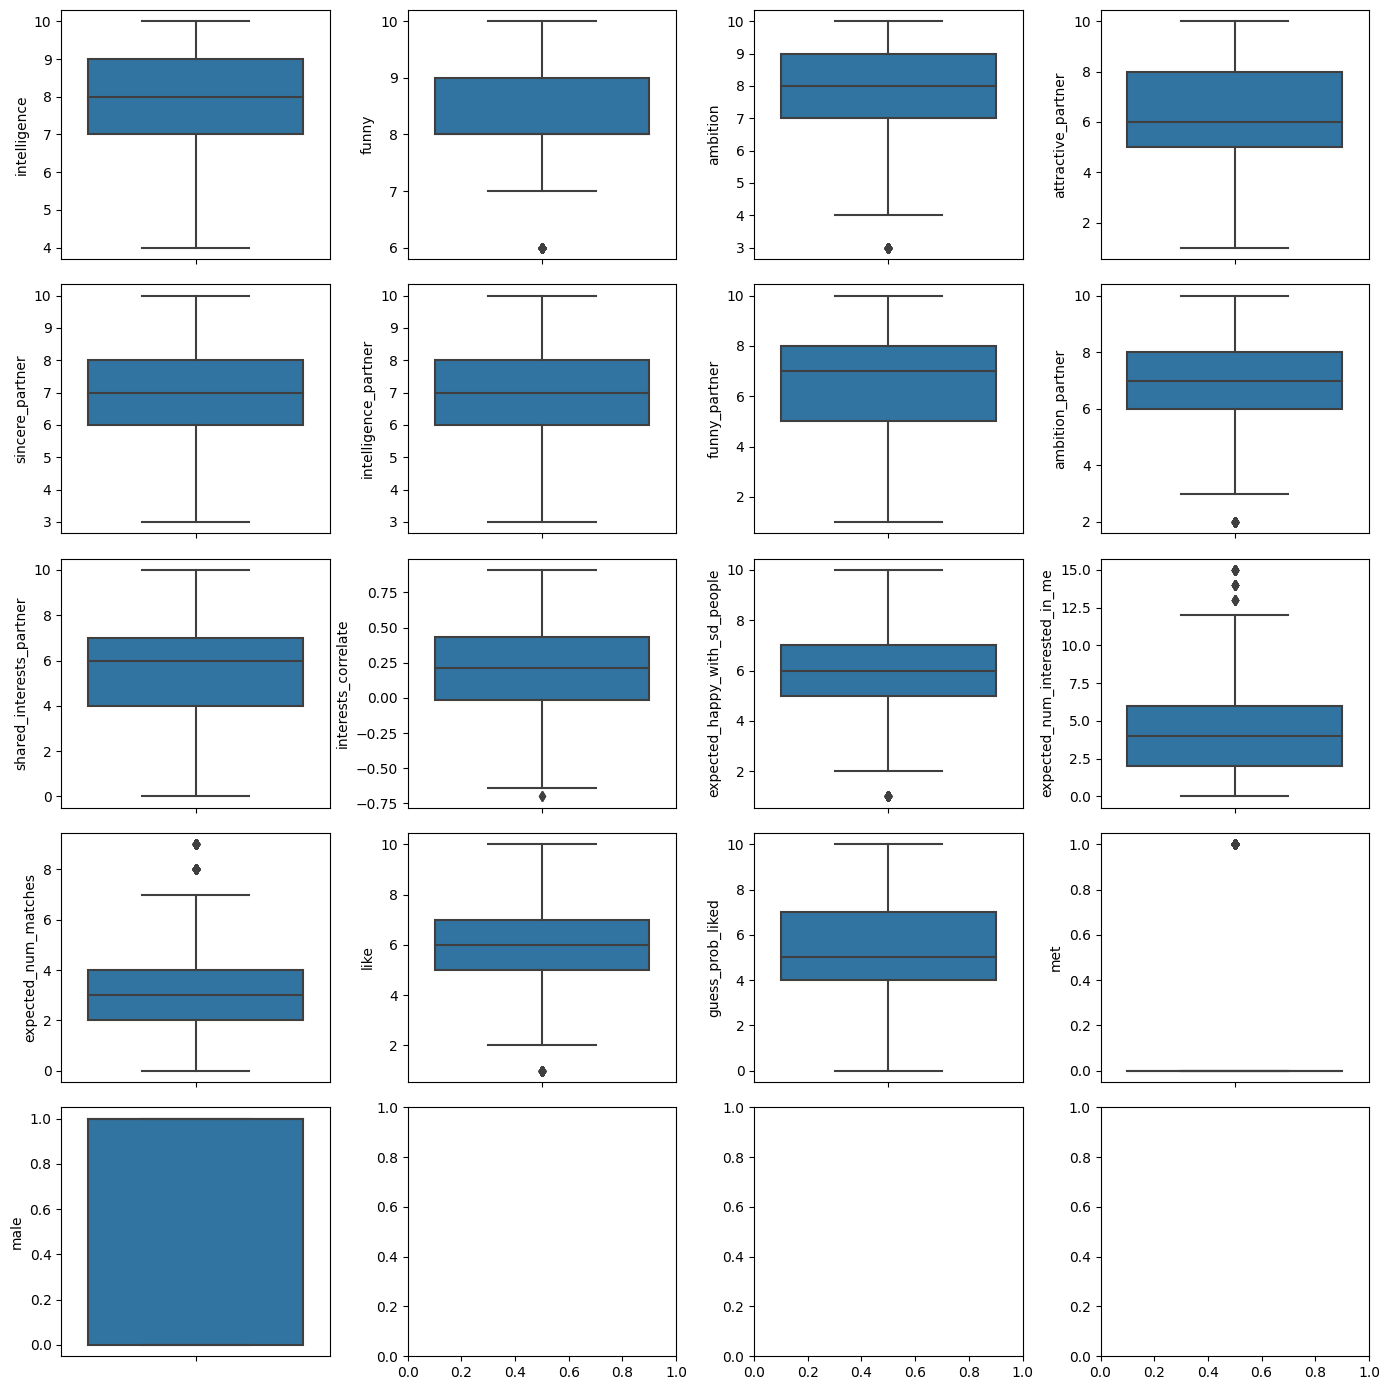

In [ ]:
temp = []
for i in df.columns[24:46].tolist():
        if df.dtypes[i] == 'uint8' or df.dtypes[i] == 'float64':
            print(i, ':' , df.dtypes[i])
            temp.append(i)



plt.rcParams["figure.figsize"] = [14.00, 14.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(5, 4)

linha = 0
coluna = 0
for i in temp:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0

plt.show()

AM

In [ ]:
# Segmenta o dataset
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
# Clona a lista que terão diferentes tratamentos em cédulas futuras
numeric_data1 = numeric_data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age_o                          8206 non-null   float64
 1   d_age                          8023 non-null   float64
 2   samerace                       8378 non-null   float64
 3   importance_same_race           8299 non-null   float64
 4   pref_o_attractive              8070 non-null   float64
 5   pref_o_sincere                 8191 non-null   float64
 6   pref_o_intelligence            8007 non-null   float64
 7   pref_o_funny                   8131 non-null   float64
 8   pref_o_ambitious               8243 non-null   float64
 9   pref_o_shared_interests        8249 non-null   float64
 10  attractive_o                   8158 non-null   float64
 11  sinsere_o                      7969 non-null   float64
 12  intelligence_o                 8019 non-null   f

In [ ]:
# Remove atributos que não devem ser normalizados
numeric_data1.remove('age_o')
numeric_data1.remove('d_age')

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
# Sem balancear classes

# validação cruzada estratificada com 10 folds
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

y_train = np.array(y_train)

k_list = []
mean_acc = []
mean_f1 = []
std_acc = []

# k partindo de 3 para evitar overfit extremo, indo de 2 em 2 para evitar 'empates'
for k in np.arange(1,30,2):
  print('----------------------------Tentando k = ', k, '----------------------------')
  fold = 1
  score_acc = []
  score_f1 = []
  #percorre os folds
  for train_index, val_index in skf.split(X_train, y_train):

      # separando os documentos de treino e teste considerando cada fold.
      x_train, x_val = X_train.iloc[train_index], X_train.iloc[val_index]
      labels_train, labels_val = y_train[train_index], y_train[val_index]

      # normalização dos dados separadamete
      df_normalized = (x_train[numeric_data1] - x_train[numeric_data1].min()) / (x_train[numeric_data1].max() - x_train[numeric_data1].min())
      df_normalized = (x_val[numeric_data1] - x_val[numeric_data1].min()) / (x_val[numeric_data1].max() - x_val[numeric_data1].min())

      # tratamento dos dados NaN
      imputer = SimpleImputer(strategy='median')
      for e in numeric_data:
        x_train.loc[:, e] = imputer.fit_transform(x_train[[e]]).squeeze()
        x_val.loc[:, e] = imputer.transform(x_val[[e]]).squeeze()

      # classificador
      clf = KNeighborsClassifier(n_neighbors=k)
      clf.fit(x_train,labels_train)


      # imprimindo resultados
      print('=======================================================================')
      print('Fold =',fold,' k=',k)

      acc = clf.score(x_val, labels_val)
      print('ACC =',acc)

      labels_pred = clf.predict(x_val)
      f1 = f1_score(labels_val, labels_pred, pos_label='1')
      print('F1-Score = ', f1)
      print('=======================================================================')

      score_acc.append(acc)
      score_f1.append(f1)
      fold+=1

  print('Mean Acc', np.mean(score_acc), ' +/- ', np.std(score_acc))
  print('Mean F1-Score', np.mean(score_f1))
  k_list.append(k)
  mean_acc.append(np.mean(score_acc))
  std_acc.append(np.std(score_acc))
  mean_f1.append(np.mean(score_f1))

----------------------------Tentando k =  1 ----------------------------
Fold = 1  k= 1
ACC = 0.7551669316375199
F1-Score =  0.23762376237623764
Fold = 2  k= 1
ACC = 0.7678855325914149
F1-Score =  0.2912621359223301
Fold = 3  k= 1
ACC = 0.7726550079491256
F1-Score =  0.2885572139303483
Fold = 4  k= 1
ACC = 0.7961783439490446
F1-Score =  0.3191489361702128
Fold = 5  k= 1
ACC = 0.7770700636942676
F1-Score =  0.2857142857142857
Fold = 6  k= 1
ACC = 0.7786624203821656
F1-Score =  0.28717948717948716
Fold = 7  k= 1
ACC = 0.7754777070063694
F1-Score =  0.3188405797101449
Fold = 8  k= 1
ACC = 0.785031847133758
F1-Score =  0.3601895734597156
Fold = 9  k= 1
ACC = 0.7882165605095541
F1-Score =  0.3316582914572865
Fold = 10  k= 1
ACC = 0.7707006369426752
F1-Score =  0.28712871287128716
Mean Acc 0.7767045051795894  +/-  0.010865821415352351
Mean F1-Score 0.3007302978791335
----------------------------Tentando k =  3 ----------------------------
Fold = 1  k= 3
ACC = 0.7965023847376789
F1-Score =  0

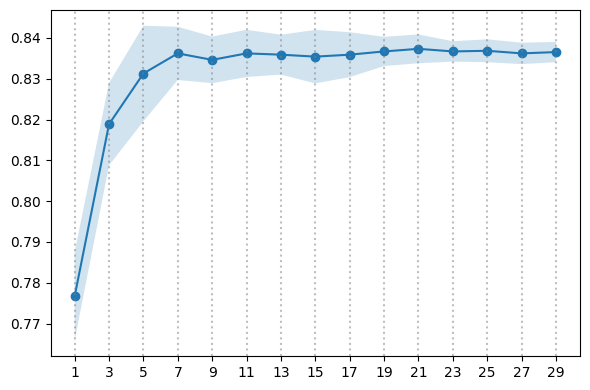

In [ ]:
# Plotagem gráfico acc
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(k_list, mean_acc, 'o-')
ax.fill_between(np.asarray(k_list), np.asarray(mean_acc) - np.asarray(std_acc), np.asarray(mean_acc) + np.asarray(std_acc), alpha=0.2)

ax.set_xticks(np.arange(1,30,2))

for x in np.arange(1,30,2):
    ax.axvline(x, linestyle=':', color='gray', alpha=0.5)

plt.show()

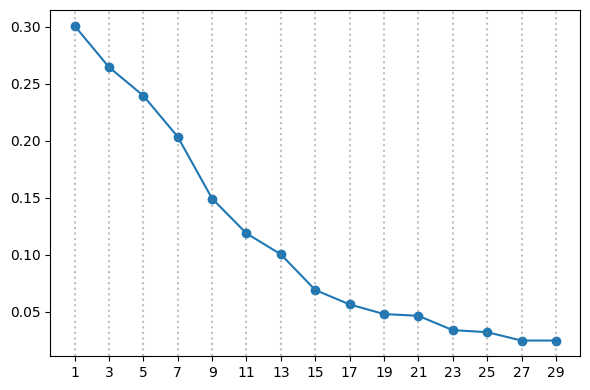

In [ ]:
# Plotagem gráfico f-1
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(k_list, mean_f1, 'o-')

ax.set_xticks(np.arange(1,30,2))

for x in np.arange(1,30,2):
    ax.axvline(x, linestyle=':', color='gray', alpha=0.5)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

# Balanceando classes
# validação cruzada estratificada com 10 folds
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

y_train = np.array(y_train)

k_list = []
mean_acc = []
mean_f1 = []
std_acc = []

# k partindo de 3 para evitar overfit extremo, indo de 2 em 2 para evitar 'empates'
for k in np.arange(1,20,2):
  print('----------------------------Tentando k = ', k, '----------------------------')
  fold = 1
  score_acc = []
  score_f1 = []
  #percorre os folds
  for train_index, val_index in skf.split(X_train, y_train):

      # separando os documentos de treino e teste considerando cada fold.
      x_train, x_val = X_train.iloc[train_index], X_train.iloc[val_index]
      labels_train, labels_val = y_train[train_index], y_train[val_index]

      # normalização dos dados separadamete
      df_normalized = (x_train[numeric_data1] - x_train[numeric_data1].min()) / (x_train[numeric_data1].max() - x_train[numeric_data1].min())
      df_normalized = (x_val[numeric_data1] - x_val[numeric_data1].min()) / (x_val[numeric_data1].max() - x_val[numeric_data1].min())

      # tratamento dos dados NaN
      imputer = SimpleImputer(strategy='median')
      for e in numeric_data:
        x_train.loc[:, e] = imputer.fit_transform(x_train[[e]]).squeeze()
        x_val.loc[:, e] = imputer.transform(x_val[[e]]).squeeze()

      # Aplica smote para rebalancear segmento do dataset
      smote = SMOTE()
      x_train_resampled, labels_train_resampled = smote.fit_resample(x_train, labels_train)

      # classificador
      clf = KNeighborsClassifier(n_neighbors=k)
      clf.fit(x_train_resampled,labels_train_resampled)


      # imprimindo resultados
      print('=======================================================================')
      print('Fold =',fold,' k=',k)

      acc = clf.score(x_val, labels_val)
      print('ACC =',acc)

      labels_pred = clf.predict(x_val)
      f1 = f1_score(labels_val, labels_pred, pos_label='1')
      print('F1-Score = ', f1)
      print('=======================================================================')

      score_acc.append(acc)
      score_f1.append(f1)
      fold+=1

  print('Mean Acc', np.mean(score_acc), ' +/- ', np.std(score_acc))
  print('Mean F1-Score', np.mean(score_f1))
  k_list.append(k)
  mean_acc.append(np.mean(score_acc))
  std_acc.append(np.std(score_acc))
  mean_f1.append(np.mean(score_f1))

----------------------------Tentando k =  1 ----------------------------
Fold = 1  k= 1
ACC = 0.7217806041335453
F1-Score =  0.29718875502008035
Fold = 2  k= 1
ACC = 0.7074721780604134
F1-Score =  0.30303030303030304
Fold = 3  k= 1
ACC = 0.7313195548489666
F1-Score =  0.3524904214559387
Fold = 4  k= 1
ACC = 0.7611464968152867
F1-Score =  0.38016528925619836
Fold = 5  k= 1
ACC = 0.732484076433121
F1-Score =  0.328
Fold = 6  k= 1
ACC = 0.7292993630573248
F1-Score =  0.3089430894308943
Fold = 7  k= 1
ACC = 0.7356687898089171
F1-Score =  0.36153846153846153
Fold = 8  k= 1
ACC = 0.7165605095541401
F1-Score =  0.3503649635036496
Fold = 9  k= 1
ACC = 0.7452229299363057
F1-Score =  0.3388429752066116
Fold = 10  k= 1
ACC = 0.7388535031847133
F1-Score =  0.33333333333333337
Mean Acc 0.7319808005832734  +/-  0.014273085625711128
Mean F1-Score 0.3353897591775471
----------------------------Tentando k =  3 ----------------------------
Fold = 1  k= 3
ACC = 0.6788553259141494
F1-Score =  0.3765432098

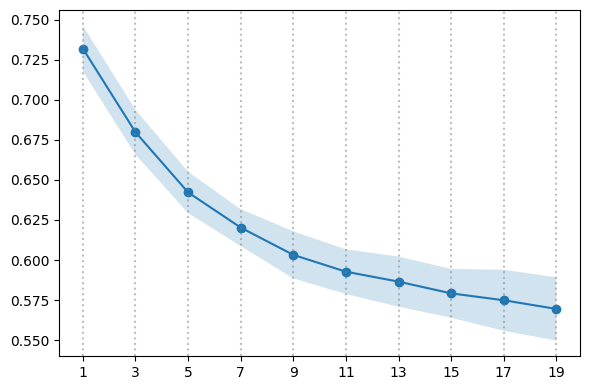

In [ ]:
# Plotagem gráfico acc
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(k_list, mean_acc, 'o-')
ax.fill_between(np.asarray(k_list), np.asarray(mean_acc) - np.asarray(std_acc), np.asarray(mean_acc) + np.asarray(std_acc), alpha=0.2)

ax.set_xticks(np.arange(1,20,2))

for x in np.arange(1,20,2):
    ax.axvline(x, linestyle=':', color='gray', alpha=0.5)

plt.show()

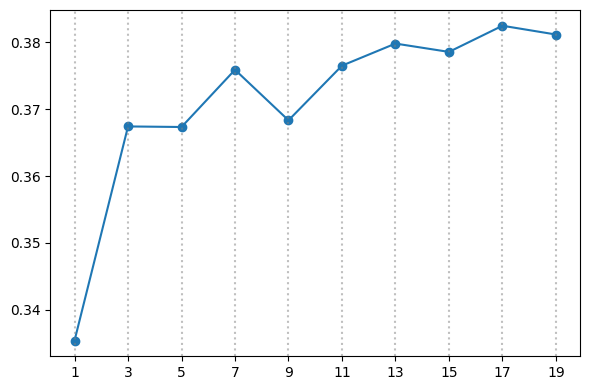

In [ ]:
# Plotagem gráfico f-1
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(k_list, mean_f1, 'o-')

ax.set_xticks(np.arange(1,20,2))

for x in np.arange(1,20,2):
    ax.axvline(x, linestyle=':', color='gray', alpha=0.5)
plt.show()

Conclusão:
1. Sem o balanceamento de classes, foi obtido como resultado k = 21  como o de maior acurácia
2. Com o balanceamento de classes o melhor resultado que ainda evita parcialmente overfitting é k = 5, sendo o de maior acurácia
3. Contudo, ao observar a distribuicao de dados, caso fosse imputado apenas '0' - não match - teria uma acurácia de cerca de 83,5%, sendo que no primeiro caso foi de 83,7%, tendo um ganho muito baixo, enquanto no segundo ficou abaixo com 64,2%